In [60]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [61]:
base = pd.read_csv('AirPassengers.csv')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [62]:
#Type visualization
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [63]:
dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')
base = pd.read_csv('AirPassengers.csv', parse_dates = ['Month'],
                   index_col = 'Month', date_parser = dateparse)
base

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [64]:
# DataFrame Index Visualization
base.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [65]:
#Times Series Creation
ts = base['#Passengers']
ts

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [66]:
# Log Visualization
ts[1]

118

In [67]:
# Year/Month Visualization
ts['1949-02']

Month
1949-02-01    118
Name: #Passengers, dtype: int64

In [68]:
#Date Visualization
ts[datetime(1949,2,1)]

118

In [69]:
ts['1950-01-01':'1950-07-31']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [70]:
ts[:'1950-07-31']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
Name: #Passengers, dtype: int64

In [71]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

In [72]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [73]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

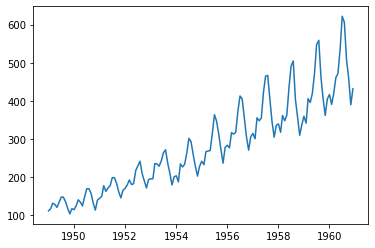

In [74]:
plt.plot(ts)

Month
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: A-DEC, Name: #Passengers, dtype: int64

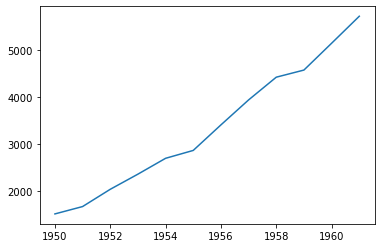

In [75]:
#Year Visualization
yearTs = ts.resample('A').sum()
plt.plot(yearTs)
yearTs

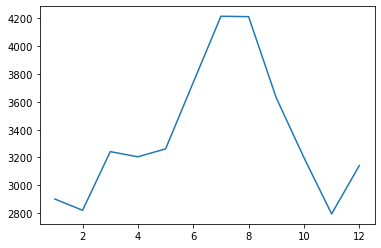

In [76]:
# Month Visualization
monthTs = ts.groupby([lambda x: x.month]).sum()
plt.plot(monthTs)

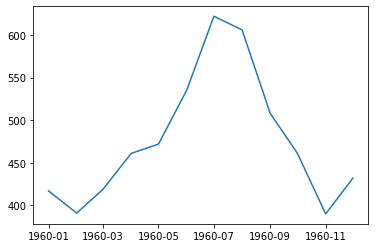

In [77]:
# date Visualization
dateTs = ts['1960-01-01':'1960-12-01']
plt.plot(dateTs)

In [78]:
#Decomposition
decompose = seasonal_decompose(ts)
trend = decompose.trend
seasonal = decompose.seasonal
random = decompose.resid

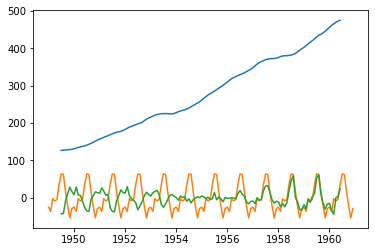

In [79]:
# Decomposition Graph
plt.plot(trend)
plt.plot(seasonal)
plt.plot(random)

In [80]:
#Arima
model = ARIMA(ts, order=(2, 1, 2),freq=ts.index.inferred_freq) 
model1 = model.fit()
model1.summary()

C:\Users\Pichau\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\Pichau\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.#Passengers   No. Observations:                  143
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -666.022
Method:                       css-mle   S.D. of innovations             24.713
Date:                Sat, 07 Aug 2021   AIC                           1344.043
Time:                        23:47:50   BIC                           1361.820
Sample:                    02-01-1949   HQIC                          1351.267
                         - 12-01-1960                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5311      0.708      3.574      0.000       1.143       3.919
ar.L1.D.#Passengers     1.6477      0.033     49.932      0.000       1.583       1.712
ar.L2.D.#Passengers    -0.9094      0.033    -27.879      0.000      -0.973      -0.845
ma.L1.D.#Passengers    -1.9098      0.065    -29.518      0.000      -2.037      -1.783
ma.L2.D.#Passengers     0.9997      0.068     14.809      0.000       0.867       1.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.9059           -0.5281j            1.0486           -0.0840
AR.2            0.9059           +0.5281j            1.0486            0.0840
MA.1            0.9552           -0.2964j            1.0001           -0.0479
MA.2            0.9552           +0.2964j            1.0001            0.0479
-----------------------------------------------------------------------------
"""

In [81]:
# Predict
predict = model1.forecast(steps = 12)[0]
predict

array([433.11936966, 450.88929993, 479.81343666, 511.97463456,
       539.32604629, 555.80855804, 558.75621983, 549.28641442,
       531.66465819, 511.90315938, 496.0292888 , 488.50697532])

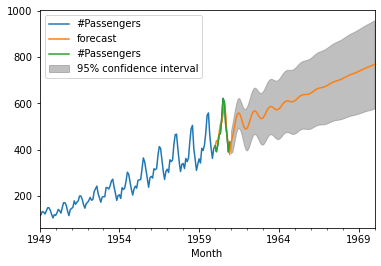

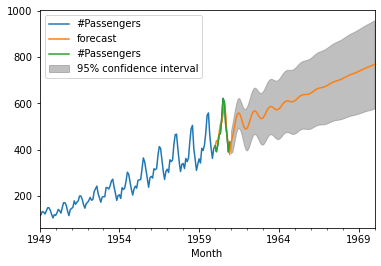

In [82]:
# axle Creation for Times series complete
axle = ts.plot()
model1.plot_predict('1960-01-01', '1970-01-01',
                             ax = axle, plot_insample = True)